In [1]:
import pandas as pd
df = pd.read_csv('data/preprocessed.csv').drop('Unnamed: 0', axis=1)

In [2]:
# convert all columns to categorical type
for col in df.columns:
    df[col] = df[col].astype('category')

In [3]:
df.dtypes

Resident_Status           category
Education                 category
Month_Of_Death            category
Sex                       category
Age_Recode_12             category
Place_Of_Death            category
Marital_Status            category
DOW_of_Death              category
Injured_At_Work           category
Manner_Of_Death           category
Race                      category
Hispanic_Origin_Recode    category
dtype: object

In [4]:
"""select training set size
    uncomment the size to be used"""

train_df = df.sample(100000)
# train_df = df

In [5]:
# one-hot encode selected columns
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1).drop(each, axis=1)
    return df

In [6]:
# field used as the y-label (prediction)
y = 'Education'

# fields used as the X (predictors)
onehotlist = ['Resident_Status',
#               'Education',
#               'Month_Of_Death',
              'Sex',
              'Age_Recode_12',
              'Place_Of_Death',
              'Marital_Status',
#               'DOW_of_Death',
              'Injured_At_Work',
              'Manner_Of_Death',
              'Race',
#               'Hispanic_Origin_Recode'
             ]

onehot_df = one_hot(train_df[onehotlist], [onehotlist])

In [7]:
onehot_df.columns

Index(['Resident_Status_1', 'Resident_Status_2', 'Resident_Status_3',
       'Resident_Status_4', 'Sex_F', 'Sex_M', 'Age_Recode_12_1',
       'Age_Recode_12_2', 'Age_Recode_12_3', 'Age_Recode_12_4',
       'Age_Recode_12_5', 'Age_Recode_12_6', 'Age_Recode_12_7',
       'Age_Recode_12_8', 'Age_Recode_12_9', 'Age_Recode_12_10',
       'Age_Recode_12_11', 'Age_Recode_12_12', 'Place_Of_Death_1',
       'Place_Of_Death_2', 'Place_Of_Death_3', 'Place_Of_Death_4',
       'Place_Of_Death_5', 'Place_Of_Death_6', 'Place_Of_Death_7',
       'Place_Of_Death_9', 'Marital_Status_D', 'Marital_Status_M',
       'Marital_Status_S', 'Marital_Status_U', 'Marital_Status_W',
       'Injured_At_Work_N', 'Injured_At_Work_U', 'Injured_At_Work_Y',
       'Manner_Of_Death_1', 'Manner_Of_Death_2', 'Manner_Of_Death_3',
       'Manner_Of_Death_4', 'Manner_Of_Death_5', 'Manner_Of_Death_7',
       'Manner_Of_Death_9', 'Race_1', 'Race_2', 'Race_3', 'Race_4', 'Race_5',
       'Race_6', 'Race_7', 'Race_18', 'Race_28', 

In [8]:
from sklearn.model_selection import train_test_split

# split data into train data and test data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(onehot_df, train_df[y], test_size=0.2)

In [9]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

models = [
    Perceptron(n_iter=5),
    BernoulliNB(alpha=.1),
    MultinomialNB(alpha=.01),
    GaussianNB(),
    DecisionTreeClassifier(),
    LinearSVC(),
]
names = [
    'Perceptron',
    'BernoulliNB(alpha = .1)',
    'MultinomialNB',
    'GaussianNB',
    'DecisionTree',
    'LinearSVC',
]

In [10]:
from time import time
from sklearn import metrics

acc_list = []
recall_list = []
prec_list = []
f1_list = []

# iterate through models to classify, predict, and calculate metrics
for clf, name in zip(models, names):
    print('\n' + name)
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, pred)
    acc_list.append(acc)
    print("accuracy:   %0.3f" % acc)
    
    recall = metrics.recall_score(y_true=y_test, y_pred=pred, average='weighted')
    recall_list.append(recall)
    print("recall:   %0.3f" % recall)
    
    precision = metrics.precision_score(y_true=y_test, y_pred=pred, average='weighted')
    prec_list.append(precision)
    print("precision:   %0.3f" % precision)
    
    f1score = metrics.f1_score(y_true=y_test, y_pred=pred, average='weighted')
    f1_list.append(f1score)
    print("f1 score, weighted:   %0.3f" % f1score)


Perceptron


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.778
recall:   0.778
precision:   0.667
f1 score, weighted:   0.711

BernoulliNB(alpha = .1)
accuracy:   0.789
recall:   0.789
precision:   0.662
f1 score, weighted:   0.710

MultinomialNB
accuracy:   0.796
recall:   0.796
precision:   0.644


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1 score, weighted:   0.712

GaussianNB
accuracy:   0.061
recall:   0.061
precision:   0.803
f1 score, weighted:   0.110

DecisionTree
accuracy:   0.784
recall:   0.784
precision:   0.666
f1 score, weighted:   0.714

LinearSVC
accuracy:   0.802
recall:   0.802
precision:   0.643
f1 score, weighted:   0.714


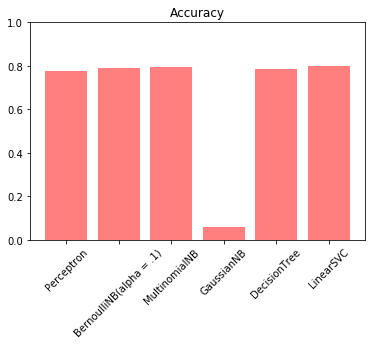

In [12]:
import matplotlib.pyplot as plt
import numpy as np

y_pos = np.arange(len(names))

plt.bar(y_pos, acc_list, align='center', alpha=0.5, color='r')
plt.xticks(y_pos, names,rotation=45)
plt.ylim(top=1)
plt.title('Accuracy')
 
plt.show()

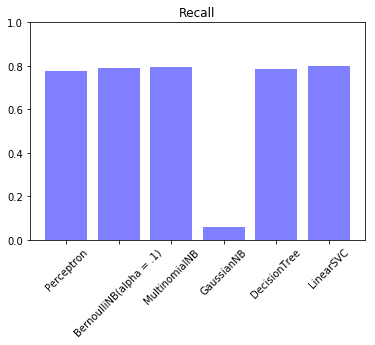

In [13]:
y_pos = np.arange(len(names))

plt.bar(y_pos, recall_list, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, names,rotation=45)
plt.ylim(top=1)
plt.title('Recall')
 
plt.show()

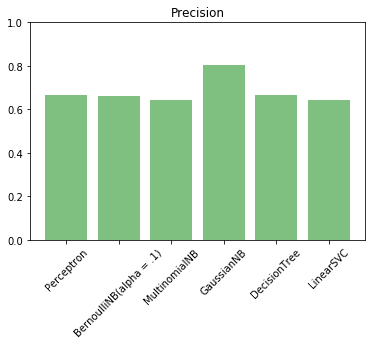

In [14]:
y_pos = np.arange(len(names))

plt.bar(y_pos, prec_list, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, names,rotation=45)
plt.ylim(top=1)
plt.title('Precision')
 
plt.show()

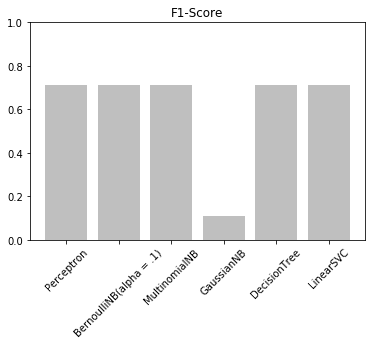

In [15]:
y_pos = np.arange(len(names))

plt.bar(y_pos, f1_list, align='center', alpha=0.5, color='grey')
plt.xticks(y_pos, names,rotation=45)
plt.ylim(top=1)
plt.title('F1-Score')
 
plt.show()